In [30]:
from utils import map_size
import networkx as nx
import random
import json
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
# A function to create a 2D map with size map_size * map_size
def endnode_graph_gen(n, topoIdx):

    seed = 8848 + topoIdx
    random.seed(seed)
    G = nx.Graph()
    # manully add all nodes
    G.add_node(0, pos=(25, 60), type='endnode', num_qubits=10)
    G.add_node(1, pos=(30, 165), type='endnode', num_qubits=10)
    G.add_node(2, pos=(65, 110), type='endnode', num_qubits=10)
    G.add_node(3, pos=(150, 175), type='endnode', num_qubits=10)
    G.add_node(4, pos=(190, 45), type='endnode', num_qubits=10)
    G.add_node(5, pos=(180, 135), type='endnode', num_qubits=10)
    G.add_node(6, pos=(225, 200), type='endnode', num_qubits=10)
    G.add_node(7, pos=(275, 140), type='endnode', num_qubits=10)

    #for a map with size 285 * 215, generate a grid of 8 * 8
    for i in range(8):
        for j in range(8):
            G.add_node(8 + i * 8 + j, pos=(i * 40, j * 30), type='repeater', num_qubits=10)
    # Do Delaunay triangulation on the nodes
    pos = nx.get_node_attributes(G, 'pos')
    points = [pos[i] for i in range(G.number_of_nodes())]
    tri = Delaunay(points)
    delaunay_edges = []
    # Extract the edges from the Delaunay triangulation
    for simplex in tri.simplices:
        for i in range(3):
            for j in range(i+1, 3):
                delaunay_edges.append((simplex[i], simplex[j]))
                
    # Add the edges to the graph    
    for edge in delaunay_edges:
        G.add_edge(edge[0], edge[1], weight=random.randint(1, 10))  

    # plot the graph
    pos = nx.get_node_attributes(G, 'pos')
    point_colors = ['r' if G.nodes[i]['type'] == 'endnode' else 'b' for i in G.nodes]
    nx.draw(G, pos, with_labels=True, node_color=point_colors, node_size=10)
    nx.draw_networkx_edges(G, pos)
    plt.show()

    # Randomly generate n nodes with 2D coordinates, and add them to the graph
    # for i in range(n):
    #     #num_qubits = random.randint(1, 10)
    #     G.add_node(i, pos=(map_size * random.random(), map_size * random.random()), type='endnode', num_qubits=random.randint(10, 30))

    # dirPath = '../dist/endnodes/'
    # fileName = 'endnodesLocs-' + str(n) + '-' + str(topoIdx) + '.json'
    # with open(dirPath + fileName, 'w') as file:
    #     json.dump(nx.node_link_data(G), file)

    # file.close()

    # return dirPath + fileName

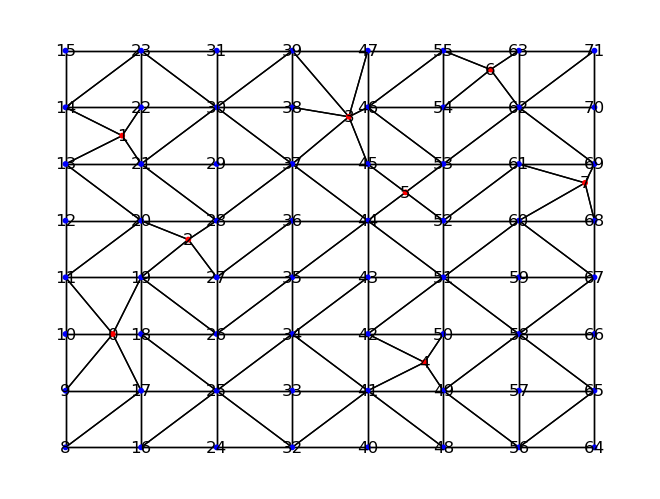

In [31]:
endnode_graph_gen(8, 0)